In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

In [2]:
import numpy as np
import lalsimulation as lalsim
import matplotlib.pyplot as plt
from copy import deepcopy
from gw_eccentricity import measure_eccentricity
from pyseobnr.generate_waveform import GenerateWaveform

/home/lpompili/.conda/envs/igwn-py310-20241109-eccentric/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
q = 1.0
chi1 = 0.0
chi2 = 0.0
eccentricity = 0.3
rel_anomaly = 0.1
f_min = 20.0
f_ref = 20.0
Mtot = 20.0
deltaT = 1 / 4096
t_back = 2000
method = "ResidualAmplitude"
verbose = False

In [4]:
m1 = q / (1.0 + q) * Mtot
m2 = 1.0 / (1.0 + q) * Mtot

parameters = {
    "mass1": m1,
    "mass2": m2,
    "spin1z": chi1,
    "spin2z": chi2,
    "f22_start": f_min,
    "eccentricity": eccentricity,
    "rel_anomaly": rel_anomaly,
    "approximant": "SEOBNRv5EHM",
    "return_modes": [(2, 2)],
    "deltaT": deltaT,
    "t_backwards": t_back,
}

parameters_qc = deepcopy(parameters)
parameters_qc["eccentricity"] = 0.0
parameters_qc["f22_start"] = f_min

waveform = GenerateWaveform(parameters)
times, modes = waveform.generate_td_modes()

waveform_qc = GenerateWaveform(parameters_qc)
times_qc, modes_qc = waveform_qc.generate_td_modes()

In [5]:


# Use gw_eccentricity to measure the eccentricity
dataDict = {
    "t": times,
    "hlm": {(2, 2): modes[2, 2]},
    "t_zeroecc": times_qc,
    "hlm_zeroecc": {(2, 2): modes_qc[2, 2]},
}

if not f_ref:
    f_ref = f_min

return_dict = measure_eccentricity(
    fref_in=f_ref,
    method=method,
    dataDict=dataDict,
    num_orbits_to_exclude_before_merger=1,
)

e_gw = return_dict["eccentricity"]
mean_anomaly = return_dict["mean_anomaly"]

if verbose:
    print(
        f"method = {method:20s} eccentricity = {e_gw:.6f}, mean anomaly = {mean_anomaly:.6f}"
    )

    gwecc_object = return_dict["gwecc_object"]
    _, _ = gwecc_object.make_diagnostic_plots()



/home/lpompili/.conda/envs/igwn-py310-20241109-eccentric/lib/python3.10/site-packages/gw_eccentricity/eccDefinition.py:1788: UserWarning: egw(t) is nonmonotonic in the range [-0.03538262556317677, -0.031232234938176798]
For more verbose output use `debug_level=1`.
  debug_message(message, self.debug_level,


In [6]:
e_gw, mean_anomaly

(0.3007538896451448, 6.277493378634521)

In [7]:
Mtot = 50.0

m1 = q / (1.0 + q) * Mtot
m2 = 1.0 / (1.0 + q) * Mtot

parameters = {
    "mass1": m1,
    "mass2": m2,
    "spin1z": chi1,
    "spin2z": chi2,
    "f22_start": f_min,
    "eccentricity": eccentricity,
    "rel_anomaly": rel_anomaly,
    "approximant": "SEOBNRv5EHM",
    "return_modes": [(2, 2)],
    "deltaT": deltaT,
    "t_backwards": 0.0,
}

waveform = GenerateWaveform(parameters)
times, modes = waveform.generate_td_modes()

parameters_2 = deepcopy(parameters)
parameters_2["t_backwards"] = 2000.0
waveform = GenerateWaveform(parameters_2)
times_2, modes_2 = waveform.generate_td_modes()

parameters_3 = deepcopy(parameters)
parameters_3["t_backwards"] = 5000.0
waveform = GenerateWaveform(parameters_3)
times_3, modes_3 = waveform.generate_td_modes()

/home/lpompili/.conda/envs/igwn-py310-20241109-eccentric/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


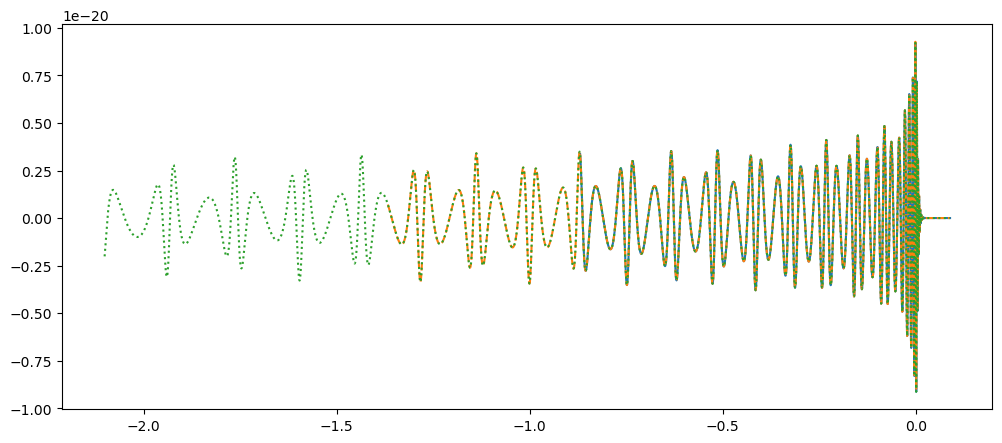

In [8]:
plt.figure(figsize=(12,5))

plt.plot(times, modes[(2,2)])
plt.plot(times_2, modes_2[(2,2)], ls = "--")
plt.plot(times_3, modes_3[(2,2)], ls = ":")